In [1]:
import pandas as pd
import numpy as np
from data_storage import create_connection
import matplotlib.pyplot as plt

In [2]:
connection = create_connection("../database/crypto_billionairs.db")

In [3]:
sql = 'SELECT table_name'\
        ', annualized_return as annualized_return'\
        ', annualized_return / trades_count AS ann_return_per_trade'\
        ', win_rate AS win_rate'\
        ', sharpe_ratio_annualized as sharpe_ratio'\
        ', sortino_ratio_annualized as sortino_ratio'\
        ', maximum_drawdown as maximum_drawdown'\
        ', calmar_ratio_annualized as calmar_ratio'\
        ' FROM cryptocurrencies_risk_metrics_1m_abnormal_day_ml_threshold'\
        ' where timehorizon >= 365 and table_name not like "%ONT%"'
       

df = pd.read_sql_query(f"{sql}", connection)
df.head()

,table_name,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
0,no_0_threshold_ensemble_long_ADA_1,-9.876593,-0.056117,36.363636,-0.210447,-2.224285,-1.000000,-0.997011
1,no_0_threshold_ensemble_long_BCH_1,-4.025214,-0.017129,36.170213,-9.607985,-2.246266,-0.999909,-1.000054
2,no_0_threshold_ensemble_long_BSV_1,-9.976193,-0.066954,35.570470,-4.384513,-2.238681,-0.995944,-1.001682
3,no_0_threshold_ensemble_long_BTC_1,-1.781089,-0.002805,40.944882,-13.220623,-2.125844,-1.000000,-0.999997
4,no_0_threshold_ensemble_long_BTG_1,-3.881754,-0.015223,40.000000,-0.174711,-2.225613,-1.000000,-0.999639


In [4]:
df["threshold"] = df["table_name"].str.split("_").str[1].astype(int)
df["type"] = df["table_name"].str.split("_").str[4]
df = df.drop(["table_name"], axis = 1)

In [5]:
df_plt = df.groupby(by=["type", "threshold"]).mean()

In [6]:
df_plt.xs("short")

,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
threshold,,,,,,,
0,-13.557326,-1.337451,38.527875,-3.984307,-1.766781,-0.999946,-0.999846
1,-13.568487,-2.177471,36.989676,-4.012305,-1.897210,-1.000000,-1.000000
2,-12.948098,-2.134686,36.345659,-3.842635,-1.884853,-1.000000,-1.000000
3,-12.948098,-2.147455,35.470770,-3.792438,-1.839868,-1.000000,-1.000000
4,-12.948098,-2.211015,35.588374,-3.747637,-1.840966,-1.000000,-1.000000
5,-12.948098,-2.289952,34.862625,-3.730392,-1.837608,-1.000000,-1.000000
6,-12.948098,-2.342512,33.097018,-3.707459,-1.837376,-1.000000,-1.000000
7,-12.948098,-2.347834,33.050162,-3.673629,-1.852781,-1.000000,-1.000000
8,-12.948098,-2.358505,33.381776,-3.646805,-1.854052,-1.000000,-1.000000


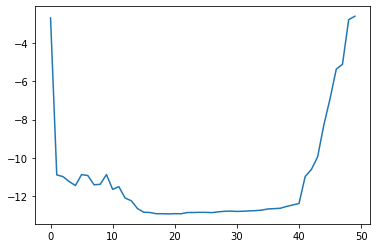

In [7]:
plt.plot(df_plt.xs("long")["annualized_return"])
plt.show()

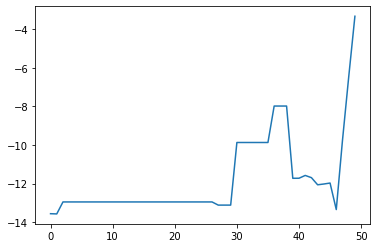

In [8]:
plt.plot(df_plt.xs("short")["annualized_return"])
plt.show()

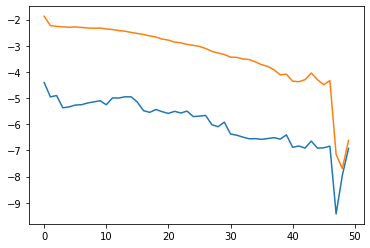

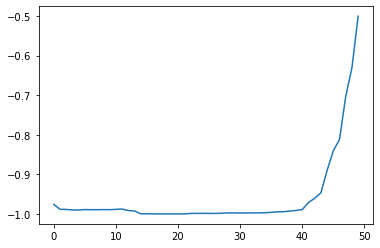

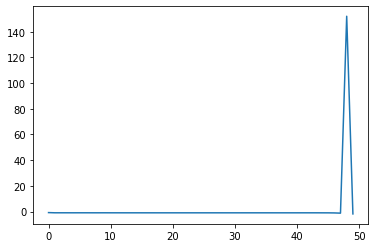

In [9]:
plt.plot(df_plt.xs("long")["sharpe_ratio"])
plt.plot(df_plt.xs("long")["sortino_ratio"])
plt.show()
plt.plot(df_plt.xs("long")["maximum_drawdown"])
plt.show()
plt.plot(df_plt.xs("long")["calmar_ratio"])
plt.show()

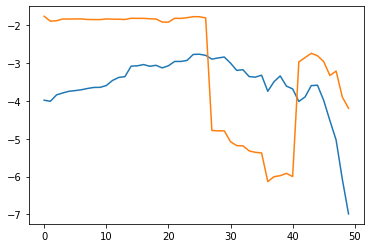

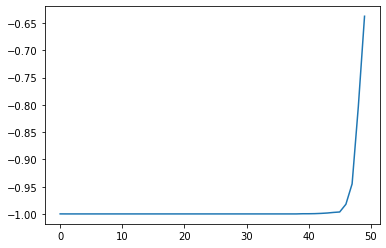

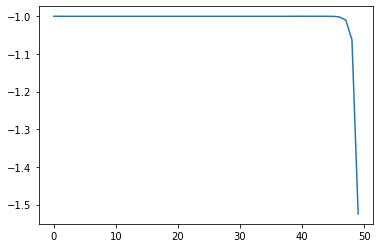

In [10]:
plt.plot(df_plt.xs("short")["sharpe_ratio"])
plt.plot(df_plt.xs("short")["sortino_ratio"])
plt.show()
plt.plot(df_plt.xs("short")["maximum_drawdown"])
plt.show()
plt.plot(df_plt.xs("short")["calmar_ratio"])
plt.show()

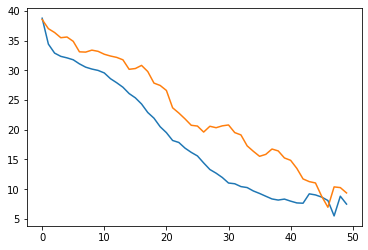

In [11]:
plt.plot(df_plt.xs("long")["win_rate"])
plt.plot(df_plt.xs("short")["win_rate"])
plt.show()